# 라이브러리 임포트
실습에 필요한 라이브러리를 임포트합니다.

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 그래프 출력을 위해 선언합니다.
%matplotlib inline
# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
np.random.seed(5)

# 데이터 불러오기 (학습 데이터, 테스트 데이터)
데이터 분석 단계(농구선수_데이터분석.ipynb)에서 생성한 농구 선수 포지션 예측하기의  
학습 데이터 및 테스트 데이터를 로드합니다.

In [2]:
train = pd.read_csv("./data/csv/basketball_train.csv")
test = pd.read_csv("./data/csv/basketball_test.csv")

# 최적의 k 찾기 (교차 검증 - cross validation)

In [3]:
# import kNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# find best k, range from 3 to half of the number of data
max_k_range = train.shape[0] // 2
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

cross_validation_scores = []
x_train = train[['3P', 'BLK' , 'TRB']]
y_train = train[['Pos']]

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                             cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.8875,
 0.875,
 0.875,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.8625,
 0.875,
 0.875,
 0.875,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8,
 0.8]

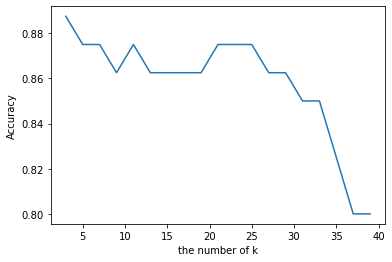

In [4]:
# visualize accuracy according to k
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [5]:
# find best k
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 3


# 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [6]:
# import libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

# select data features
x_train = train[['3P', 'BLK']]
# select target value
y_train = train[['Pos']]

# setup knn using train data
knn.fit(x_train, y_train.values.ravel())

# select data feature to be used for prediction
x_test = test[['3P', 'BLK']]

# select target value
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)

In [7]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [8]:
# check accuracy
print("accuracy : "+ str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 1.0


# 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [9]:
knn = KNeighborsClassifier(n_neighbors=k)

# select data features to be used in train
x_train = train[['3P', 'BLK', 'TRB']]
# select target
y_train = train[['Pos']]

# build knn model
knn.fit(x_train, y_train.values.ravel())

# select features to be used for prediction
x_test = test[['3P', 'BLK', 'TRB']]

# select target
y_test = test[['Pos']]

# test
pred = knn.predict(x_test)

In [10]:
# check ground_truth with knn prediction
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test.values.ravel()}) 
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [11]:
# check accuracy
print("accuracy : " + str( accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.95
